In [265]:
import matplotlib.pyplot as plt
import numpy as np

In [266]:
pts = np.random.randn(2, 7)

In [267]:
# Reparametrize the curve.
x = pts[0, :]
y = pts[1, :]
accum_s = np.hstack((0, np.cumsum(np.hypot(np.diff(x), np.diff(y)))))

In [268]:
def calc_coeffs(data):
    n = data.shape[1]
    mat = np.zeros((4 * (n - 1), 4 * (n-1)))
    vec = np.zeros((4 * (n - 1), 1))

    # 0th derivative continuity.
    ofs = 0
    for i in range(n - 1):
        mat[ofs + 2 * i, 4 * i] = data[0, i] ** 3
        mat[ofs + 2 * i, 4 * i + 1] = data[0, i] ** 2
        mat[ofs + 2 * i, 4 * i + 2] = data[0, i]
        mat[ofs + 2 * i, 4 * i + 3] = 1
        mat[ofs + 2 * i + 1, 4 * i] = data[0, i + 1] ** 3
        mat[ofs + 2 * i + 1, 4 * i + 1] = data[0, i + 1] ** 2
        mat[ofs + 2 * i + 1, 4 * i + 2] = data[0, i + 1]
        mat[ofs + 2 * i + 1, 4 * i + 3] = 1
        vec[ofs + 2 * i, 0] = data[1, i]
        vec[ofs + 2 * i + 1, 0] = data[1, i + 1]

    # 1st derivative continuity.
    ofs = 2 * (n - 1)
    for i in range(n - 2):
        mat[ofs + i, 4 * i] = 3 * data[0, i + 1] ** 2
        mat[ofs + i, 4 * i + 1] = 2 * data[0, i + 1]
        mat[ofs + i, 4 * i + 2] = 1
        mat[ofs + i, 4 * i + 4] = -3 * data[0, i + 1] ** 2
        mat[ofs + i, 4 * i + 5] = -2 * data[0, i + 1]
        mat[ofs + i, 4 * i + 6] = -1
        vec[ofs + i, 0] = 0

    # 2nd derivative continuity.
    ofs = 2 * (n - 1) + (n - 2)
    for i in range(n - 2):
        mat[ofs + i, 4 * i] = 6 * data[0, i + 1]
        mat[ofs + i, 4 * i + 1] = 2
        mat[ofs + i, 4 * i + 4] = -6 * data[0, i + 1]
        mat[ofs + i, 4 * i + 5] = -2
        vec[ofs + i, 0] = 0
    
    # Quadratic spline condition.
    ofs = 2 * (n - 1) + (n - 2) + (n - 2)
    mat[ofs, 0] = 1
    mat[ofs + 1, 4 * (n - 2)] = 1
    vec[ofs, 0] = 0
    vec[ofs + 1, 0] = 0

    return np.linalg.solve(mat, vec).reshape(-1)

In [269]:
def eval_spline(accum_s, s, coeffs):
    i = np.searchsorted(accum_s, s, side='right') - 1
    if i == len(accum_s) - 1:
        i -= 1
    a, b, c, d = coeffs[4 * i:4 * i + 4]
    return a * (s ** 3) + b * (s ** 2) + c * s + d

In [270]:
x_coeffs = calc_coeffs(np.vstack((accum_s, x)))
y_coeffs = calc_coeffs(np.vstack((accum_s, y)))

In [271]:
spline_x = [eval_spline(accum_s, s, x_coeffs) for s in np.linspace(accum_s[0], accum_s[-1], 300)]
spline_y = [eval_spline(accum_s, s, y_coeffs) for s in np.linspace(accum_s[0], accum_s[-1], 300)]

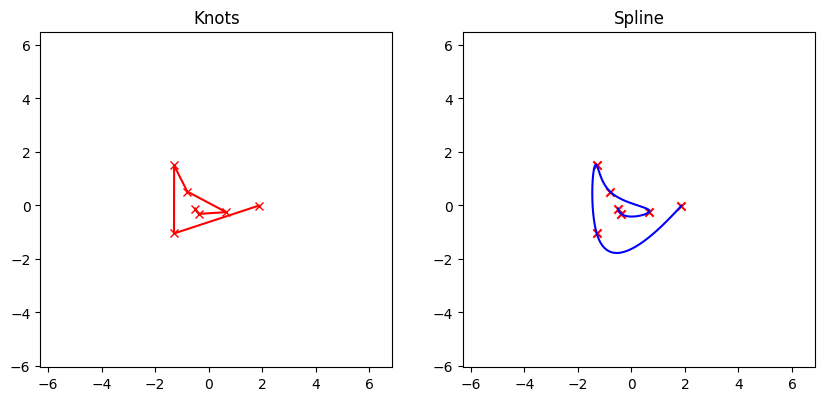

In [272]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

xlim = (min(x) - 5, max(x) + 5)
ylim = (min(y) - 5, max(y) + 5)

axs[0].set_title('Knots')
axs[0].plot(x, y, 'rx-')
axs[0].set_xlim(xlim)
axs[0].set_ylim(ylim)
axs[0].set_aspect('equal')

axs[1].set_title('Spline')
axs[1].scatter(x, y, marker='x', color='r')
axs[1].plot(spline_x, spline_y, 'b-')
axs[1].set_xlim(xlim)
axs[1].set_ylim(ylim)
axs[1].set_aspect('equal')

plt.show()